In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.random.uniform(low=-3.0, high=3.0, size=100)
y = 0.5 * (x**2) + x + 2 + np.random.normal(0, 1, size=100)
X = x.reshape(-1,1)

# 1.用sklearn.preprocessing 中PolynomialFeatures 为数据添加新的特征

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # 表示x的最高幂次是2，这里相当与在样本中添加了新特征 x**2
X2 = poly.fit_transform(X)
X2[:5,:]

array([[ 1.        ,  0.58676711,  0.34429564],
       [ 1.        , -2.15962329,  4.66397277],
       [ 1.        ,  1.70693213,  2.91361729],
       [ 1.        ,  1.95982147,  3.84090018],
       [ 1.        ,  0.61935696,  0.38360304]])

# 2.对数据进行归一化处理(当degree很高时,样本”特征“间相差很大)

In [7]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std = std.fit_transform(X2)
X_std[:5,:]

array([[ 0.        ,  0.40914833, -0.96232637],
       [ 0.        , -1.21744514,  0.68900269],
       [ 0.        ,  1.07258391,  0.01987563],
       [ 0.        ,  1.22236165,  0.37435795],
       [ 0.        ,  0.42845019, -0.94729991]])

# 3.线性回归

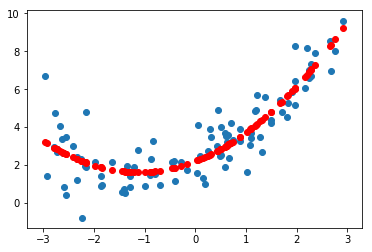

In [9]:
from sklearn.linear_model import LinearRegression
Lin = LinearRegression()
Lin.fit(X_std,y)
y_predict = Lin.predict(X_std)
plt.scatter(x, y)
plt.scatter(x, y_predict, color='r')
plt.show()

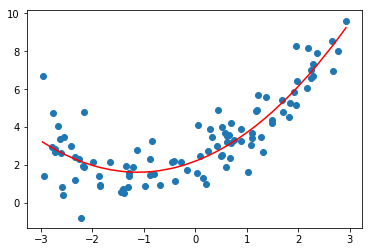

In [10]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()

由上两图可以看出, 用sklearn中的函数对数据进行处理,再进行线性回归,与我们从底层做起的效果一样,但我们实际中一般使用sklearn中的函数,这样更便捷,高效。

# 4.用pipeline 将1.2.3合并

In [11]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([("poly", PolynomialFeatures(degree=2)),
                     ("std_scaler", StandardScaler()),
                     ("lin_reg", LinearRegression())
    ])
poly_reg.fit(X,y)
y_predict2 = poly_reg.predict(X)

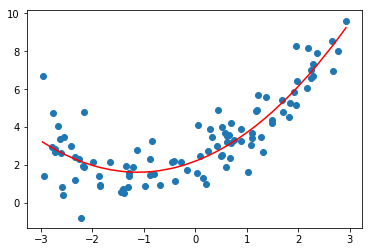

In [12]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

用pipeline是不是更简单高效呢